In [1]:
#https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/simulators/3_building_noise_models.ipynb
#https://quantumcomputing.stackexchange.com/questions/8553/how-to-selectively-apply-noise-in-qiskit-simulations
#https://en.wikipedia.org/wiki/Quantum_depolarizing_channel

In [2]:
from support_functions import *

## Depolarizing error

In [3]:
# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = depolarizing_error(prob_1, 1)#1-qubit gate
error_2 = depolarizing_error(prob_2, 2)#2-qubit gate

# Add errors to noise model
noise_model_1 = NoiseModel()
noise_model_1.add_all_qubit_quantum_error(error_1, ['rz', 'sx', 'x'])
noise_model_1.add_all_qubit_quantum_error(error_2, ['cx'])
print(noise_model_1)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'cx', 'sx', 'rz']
  All-qubits errors: ['rz', 'sx', 'x', 'cx']


['cx', 'id', 'rz', 'sx']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


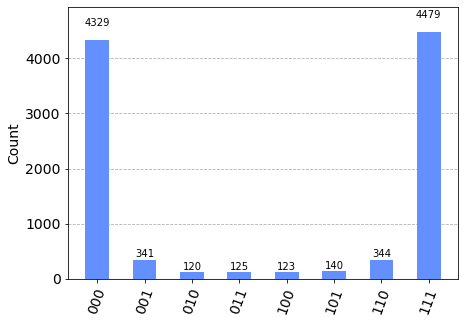

In [4]:
# Error probabilities
prob_1 = 0.02  # 1-qubit gate
prob_2 = 0.1   # 2-qubit gate

# Depolarizing quantum errors
error_1 = depolarizing_error(prob_1, 1)
error_2 = depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model_2 = NoiseModel()
print(noise_model_2.basis_gates)
noise_model_2.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model_2.add_all_qubit_quantum_error(error_2, ['cx'])

print(noise_model_2)

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

print(type(circ))

# Perform a noisy simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_model_2.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_model_2).result()
counts = result.get_counts(0)
plot_histogram(counts)

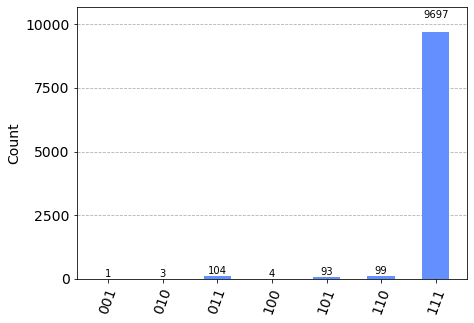

In [5]:
# Make a circuit
circ = QuantumCircuit(3, 3)
circ.x(0)
circ.x(1)
circ.x(2)
circ.measure([0, 1, 2], [0, 1, 2])

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_model_2.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_model_2).result()
counts = result.get_counts(0)
plot_histogram(counts)

['cx', 'id', 'rz', 'sx']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x']
  All-qubits errors: ['x']


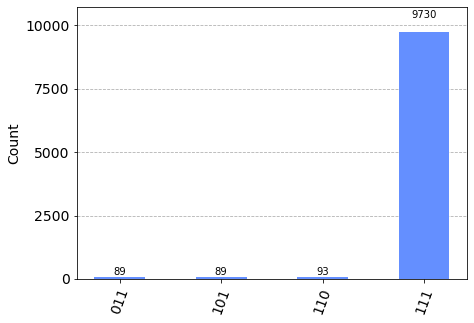

In [6]:
# Add errors to noise model
noise_model_3 = NoiseModel()
print(noise_model_3.basis_gates)
noise_model_3.add_all_qubit_quantum_error(error_1, ['x'])

print(noise_model_3)

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.x(0)
circ.x(1)
circ.x(2)
circ.measure([0, 1, 2], [0, 1, 2])

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_model_3.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_model_3).result()
counts = result.get_counts(0)
plot_histogram(counts)

['cx', 'id', 'rz', 'sx']
NoiseModel:
  Basis gates: ['cx', 'id', 'mcry', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'mcry']
  All-qubits errors: ['x', 'mcry']


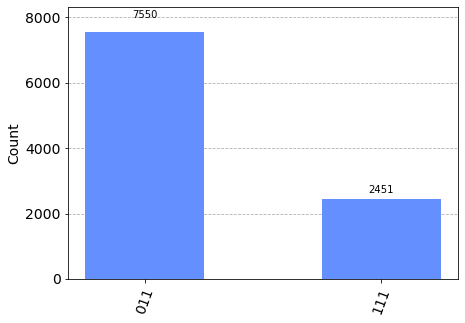

In [7]:
# Error probabilities
prob_3 = 0.00001
prob_4 = 0.1
# Depolarizing quantum errors
error_3 = depolarizing_error(prob_3, 1)  # 1-qubit gate
error_4 = depolarizing_error(prob_4, 3)  # 3-qubit gate

# Add errors to noise model
noise_model_4 = NoiseModel()
print(noise_model_4.basis_gates)
noise_model_4.add_all_qubit_quantum_error(error_3, ['x'])
noise_model_4.add_all_qubit_quantum_error(error_4, ['mcry'])

print(noise_model_4)

# Make a circuit
Qreg = qiskit.QuantumRegister( 3 )
Creg = qiskit.ClassicalRegister( 3 )
circ = qiskit.QuantumCircuit(Qreg, Creg)
circ.x(Qreg[0])
circ.x(Qreg[1])
circ.mcry(np.pi/3 , [Qreg[0], Qreg[1]], Qreg[2])
circ.measure(Qreg, Creg)

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_model_4.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_model_4).result()
counts = result.get_counts(0)
plot_histogram(counts)

## Pauli error

['cx', 'id', 'rz', 'sx']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x']
  All-qubits errors: ['x']


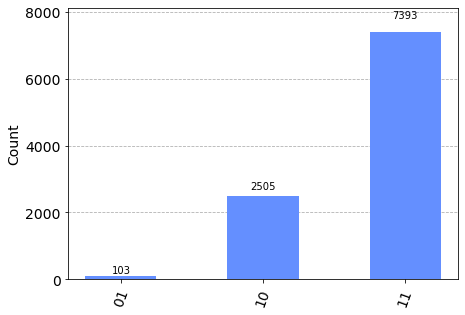

In [8]:
# Error probabilities
prob_5 = 0.01
# Depolarizing quantum errors
error_5 = pauli_error([('X', prob_5),('I', 1-prob_5)])

# Add errors to noise model
noise_model_5 = NoiseModel()
print(noise_model_5.basis_gates)
noise_model_5.add_all_qubit_quantum_error(error_5, ['x'])

print(noise_model_5)

# Make a circuit
Qreg = qiskit.QuantumRegister( 2 )
Creg = qiskit.ClassicalRegister( 2 )
circ = qiskit.QuantumCircuit(Qreg, Creg)
circ.x(Qreg[0])
circ.x(Qreg[1])
circ.cry(np.pi/3,1,0)
circ.measure(Qreg, Creg)

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_model_5.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_model_5).result()
counts = result.get_counts(0)
plot_histogram(counts)

## Measurement error

['cx', 'id', 'rz', 'sx']
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


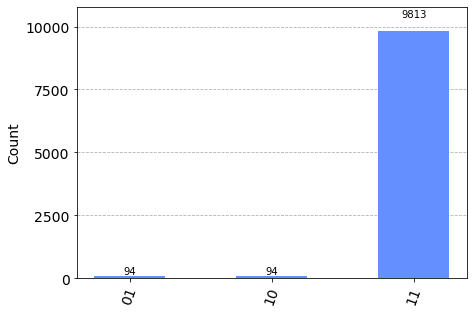

In [9]:
# Error probabilities
prob_6 = 0.01
# Depolarizing quantum errors
error_6 = pauli_error([('X', prob_6),('I', 1-prob_6)])

# Add errors to noise model
noise_model_6 = NoiseModel()
print(noise_model_6.basis_gates)
noise_model_6.add_all_qubit_quantum_error(error_6, 'measure')

print(noise_model_6)

# Make a circuit
Qreg = qiskit.QuantumRegister( 2 )
Creg = qiskit.ClassicalRegister( 2 )
circ = qiskit.QuantumCircuit(Qreg, Creg)
circ.x(Qreg[0])
circ.x(Qreg[1])
circ.measure(Qreg, Creg)

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_model_6.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_model_6).result()
counts = result.get_counts(0)
plot_histogram(counts)

## Argument error

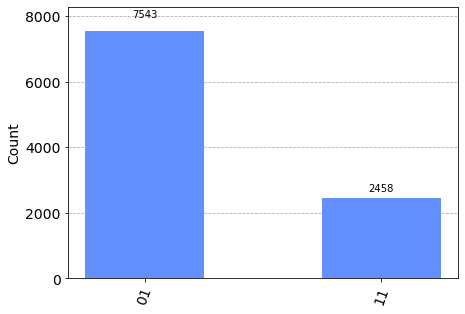

In [10]:
Qreg = qiskit.QuantumRegister( 2 )
Creg = qiskit.ClassicalRegister( 2 )
circ = qiskit.QuantumCircuit(Qreg, Creg)
circ.x(Qreg[0])
angle = np.random.choice([np.pi/4, np.pi/6])
circ.cry(2*angle, Qreg[0],Qreg[1])
circ.measure(Qreg, Creg)

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 #basis_gates=basis_gates,
                 shots = Nr_shots).result()
counts = result.get_counts(0)
plot_histogram(counts)

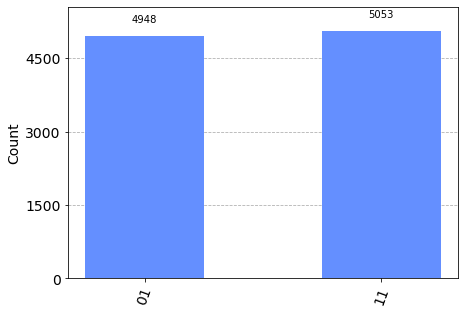

In [11]:
def gen_circ(angle):
    Qreg = qiskit.QuantumRegister( 2 )
    Creg = qiskit.ClassicalRegister( 2 )
    circ = qiskit.QuantumCircuit(Qreg, Creg)
    circ.x(Qreg[0])
    circ.cry(2*angle, Qreg[0],Qreg[1])
    circ.measure(Qreg, Creg)

    return circ


counts = {}

# Perform a noise simulation
for _ in range(1):
    circ = gen_circ(np.random.choice([np.pi/4, np.pi/6]))
    result = execute(circ, Aer.get_backend('qasm_simulator'),
                 #basis_gates=basis_gates,
                 shots = Nr_shots).result()
    counts_temp = result.get_counts(0)
    for x in counts_temp.keys():
        if( x in counts.keys() ):
            counts[x] += counts_temp[x]
        else:
            counts[x] = counts_temp[x]

plot_histogram(counts)

## Thermal relaxation error

https://quantum-computing.ibm.com/services/resources

https://quantum-computing.ibm.com/services/resources/docs/resources/terms-glossary#term-quantum-computer

https://quantum-computing.ibm.com/services/resources/docs/resources/manage/systems/execution

https://quantum-computing.ibm.com/services/resources/docs/resources/manage/systems/properties

https://quantum-computing.ibm.com/services/resources/docs/resources/manage/systems/configuration

$us$ is IBM's notation for $\mu s$.\\

For the timing of gates, these are useful links.
https://quantumcomputing.stackexchange.com/questions/2402/how-many-operations-can-a-quantum-computer-perform-per-second

https://github.com/Qiskit/ibmq-device-information/tree/master/backends/tenerife/V1

https://github.com/Qiskit/ibmq-device-information/blob/master/backends/melbourne/V1/version_log.md




NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'sz', 'measure', 'x', 'rz']
  All-qubits errors: ['measure', 'rz', 'sz', 'cx', 'x']


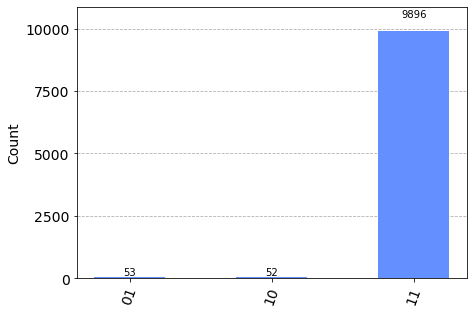

In [12]:
#Values from ibm_perth
# T1 and T2 values (T2 <= 2 x T1)
T1s = t1 = 151320
T2s = t2 = 133700

coupling_map = CouplingMap([[0,1], [1,0], [1,2], [2,1], [1,3], [3,1], [3,5], [5,3], [4,5], [5,4], [5,6], [6,5]])

# Instruction times (in nanoseconds)
time_id = 0
time_sx = 140
time_rz = 140
time_x = 140
time_cx = 444
#time_reset = 1000  # 1 microsecond
time_measure = 675

# QuantumError objects
#errors_reset = thermal_relaxation_error(t1, t2, time_reset)
errors_measure = thermal_relaxation_error(t1, t2, time_measure)
errors_id  = thermal_relaxation_error(t1, t2, time_id)
errors_rz  = thermal_relaxation_error(t1, t2, time_rz)
errors_sx  = thermal_relaxation_error(t1, t2, time_sx)
errors_x  = thermal_relaxation_error(t1, t2, time_x)
errors_cx = thermal_relaxation_error(t1, t2, time_cx).expand(thermal_relaxation_error(t1, t2, time_cx))

# Add errors to noise model
noise_thermal = NoiseModel()
#noise_thermal.add_all_qubit_quantum_error(errors_reset, "reset")
noise_thermal.add_all_qubit_quantum_error(errors_measure, "measure")
noise_thermal.add_all_qubit_quantum_error(errors_id, "id")
noise_thermal.add_all_qubit_quantum_error(errors_rz, "rz")
noise_thermal.add_all_qubit_quantum_error(errors_sx, "sz")
noise_thermal.add_all_qubit_quantum_error(errors_cx, "cx")
noise_thermal.add_all_qubit_quantum_error(errors_x, "x")

print(noise_thermal)

# Make a circuit
Qreg = qiskit.QuantumRegister( 2 )
Creg = qiskit.ClassicalRegister( 2 )
circ = qiskit.QuantumCircuit(Qreg, Creg)
circ.x(Qreg[0])
circ.x(Qreg[1])
circ.measure(Qreg, Creg)

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=noise_thermal.basis_gates,
                 shots = Nr_shots,
                 noise_model=noise_thermal).result()
counts = result.get_counts(0)
plot_histogram(counts)

## Test 

We denote the noiseless probabilities with $p_{i}$ and the noisy ones with $q_{i}$. The error probability is given by $a$ Over the $n$ states we want to minimize the MSE $V_{1}=\sum_{i=1}^{n}(q_{i}-(ap_{i}+\frac{1-a}{n})^{2}=-\frac{(a-1)^{2}}{n}+\sum_{i}(q_{i}-ap_{i})^{2}$. This is solved by $a = \frac{-1+n\sum_{i=1}^{n}p_{i}q_{i}}{-1+n\sum_{i=1}^{n}p_{i}^{2}}$.

For the quality factor we compare $V_{1}$ to $V_{0}=\sum_{i=1}^{n}(q_{i}-p_{i})^{2}$ and take the $R^{2}=1-\frac{V_{1}}{V_{0}}$.

In [13]:
circ = random_circ(3,1)
circ.draw()

Invalid q. It must be 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 or 16..


global phase: π
                                                                     »
q30_0: ──────────────────────────────────────────────────────────────»
         ┌───┐   ┌──────────────┐                     ┌───┐          »
q30_1: ──┤ X ├───┤ Rz(0.093562) ├──────────────■──────┤ X ├───────■──»
       ┌─┴───┴──┐└────┬────┬────┘┌──────────┐┌─┴─┐┌───┴───┴────┐┌─┴─┐»
q30_2: ┤ Rz(-π) ├─────┤ √X ├─────┤ Rz(-π/2) ├┤ X ├┤ Rz(1.5412) ├┤ X ├»
       └────────┘     └────┘     └──────────┘└───┘└────────────┘└───┘»
 c6: 1/══════════════════════════════════════════════════════════════»
                                                                     »
«                                           
«q30_0: ────────────────────────────────────
«        ┌──────────────┐                   
«q30_1: ─┤ Rz(0.093562) ├───────────────────
«       ┌┴──────────────┤┌────┐┌────────┐┌─┐
«q30_2: ┤ Rz(-0.029616) ├┤ √X ├┤ Rz(-π) ├┤M├
«       └───────────────┘└────┘└────────┘└╥┘
« c6: 1/══════════════════════════════════╩═
«                                         0

In [14]:
"""
def MCRY(Qreg, angle, control_qubits, rotation_qubit):
    qc = qiskit.QuantumCircuit(Qreg)
    qc.mcry(angle, control_qubits, rotation_qubit)
    gate = qc.to_gate(label='MCRY: ' + str(round(angle/np.pi,2)) + 'PI')
    return gate

# Make a circuit
def ran_circ(q,t):
    Qreg = qiskit.QuantumRegister( q )
    Creg = qiskit.ClassicalRegister( 1 )
    circ = qiskit.QuantumCircuit(Qreg, Creg)
    n = q-1
    slc_0 = []
    for _ in range(n):
        slc_0.append(0)
    
    for _ in range(t):
        slc = []
        for _ in range(n):
            slc.append(0)
        while( slc == slc_0 ):
            slc = [ np.random.choice([0,1]) for _ in range(n) ]
        Q_slc = []
        for i in range(n):
            if(1==slc[i]):
                Q_slc.append(Qreg[i])
                circ.x(Qreg[i])
        #circ.barrier()
        angle = np.pi * np.random.uniform()
        #circ.mcry(angle,Q_slc,Qreg[n])
        circ.append(MCRY(Qreg, angle, Q_slc, Qreg[n]),Qreg)
        #circ.barrier()
        for i in range(n-1,-1,-1):
            if(1==slc[i]):
                circ.x(Qreg[i])
    
    circ.measure(Qreg[n], Creg)
    return circ
    #tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=coupling_map, optimization_level=3)
    #return tdc
    

circ_draw = ran_circ(7,2)
circ_draw.draw(output='mpl').savefig('circuit.png')
"""

"\ndef MCRY(Qreg, angle, control_qubits, rotation_qubit):\n    qc = qiskit.QuantumCircuit(Qreg)\n    qc.mcry(angle, control_qubits, rotation_qubit)\n    gate = qc.to_gate(label='MCRY: ' + str(round(angle/np.pi,2)) + 'PI')\n    return gate\n\n# Make a circuit\ndef ran_circ(q,t):\n    Qreg = qiskit.QuantumRegister( q )\n    Creg = qiskit.ClassicalRegister( 1 )\n    circ = qiskit.QuantumCircuit(Qreg, Creg)\n    n = q-1\n    slc_0 = []\n    for _ in range(n):\n        slc_0.append(0)\n    \n    for _ in range(t):\n        slc = []\n        for _ in range(n):\n            slc.append(0)\n        while( slc == slc_0 ):\n            slc = [ np.random.choice([0,1]) for _ in range(n) ]\n        Q_slc = []\n        for i in range(n):\n            if(1==slc[i]):\n                Q_slc.append(Qreg[i])\n                circ.x(Qreg[i])\n        #circ.barrier()\n        angle = np.pi * np.random.uniform()\n        #circ.mcry(angle,Q_slc,Qreg[n])\n        circ.append(MCRY(Qreg, angle, Q_slc, Qreg[n]),Q

In [15]:
circ1 = random_circ(3,1)
print(circ1.depth())
circ2 = random_circ(3,2)
print(circ2.depth())

Invalid q. It must be 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 or 16..
10


Invalid q. It must be 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 or 16..
8


{'0': 10, '1': 9991}


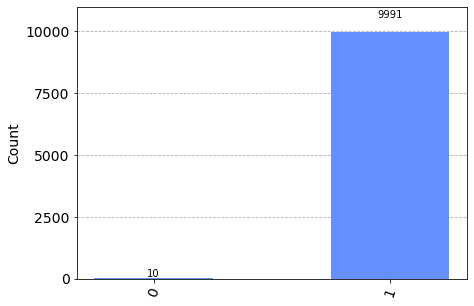

In [16]:
counts1 = clean_exc(circ)
print(counts1)
plot_histogram(counts1)

{'0': 156, '1': 9845}


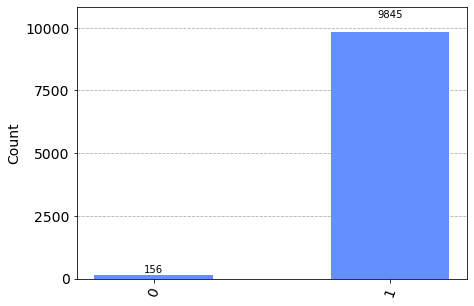

In [17]:
counts2 = noisy_exc(circ, noise_thermal)
print(counts2)
plot_histogram(counts2)

In [18]:
analyse_noise(counts1, counts2)

(0.9707444143873359, 1.0)

## 7 qubits 

In [19]:
noise_thermal = load_noise_thermal()

In [20]:
%%time
nr_qubits = 7
n_tests = N_t
R = []
A_lst = []
for q in range(nr_qubits,nr_qubits+1):
    for t in range(0,8):#(2,11):
        A_lst.append([])
        a_avg = 0
        R2_avg = 0
        R2_std = 0
        ads = 0
        add = 0
        ctr_tests = 0
        for _ in range(n_tests):
            circ = random_circ(q,t)
            counts1 = clean_exc(circ)
            counts2 = noisy_exc(circ, noise_thermal)
            a,R2 = analyse_noise(counts1, counts2)
            A_lst[t].append(a)
            ctr_tests += 1
            a_avg += a
            R2_avg += R2
            R2_std += (R2**2)
            add += circ.depth()
            ads += circ.size()
        if(ctr_tests>0):
            a_avg = a_avg/ctr_tests
            R2_avg = R2_avg/ctr_tests
            R2_std = R2_std/ctr_tests
            add = add/ctr_tests
            ads = ads/ctr_tests
            R2_std -= R2_avg**2
            if(R2_std>=0.0):
                R2_std = np.sqrt(R2_std)
            R.append([q, t, a_avg, R2_avg, R2_std, add, ads, ctr_tests].copy())
            print(q, t, ctr_tests, round(add,2), round(ads,2), " : ", round(a_avg,3), round(R2_avg,3), round(R2_std,3) )
        else:
            print(q, t, "No usable circuits found." )
            

7 0 100 1.0 1.0  :  0.98 0.94 0.237


7 1 100 75.44 100.78  :  0.549 0.86 0.347


7 2 100 137.83 192.81  :  0.281 0.82 0.384


7 3 100 207.11 291.98  :  0.152 0.82 0.384


7 4 100 292.32 420.02  :  0.062 0.73 0.444


7 5 100 363.86 524.29  :  0.031 0.75 0.433


7 6 100 449.31 643.3  :  0.017 0.806 0.392


7 7 100 506.06 727.71  :  0.022 0.77 0.421
CPU times: user 37min 48s, sys: 1min 5s, total: 38min 54s
Wall time: 42min 49s


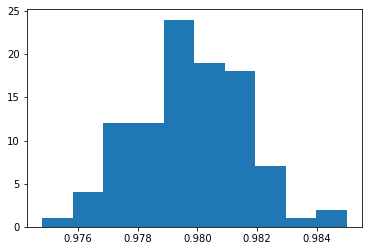

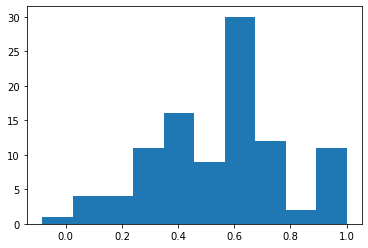

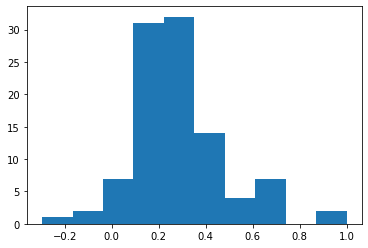

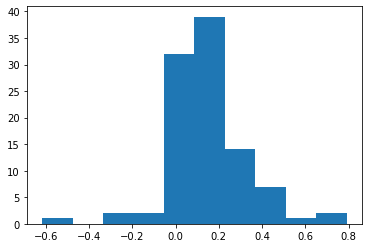

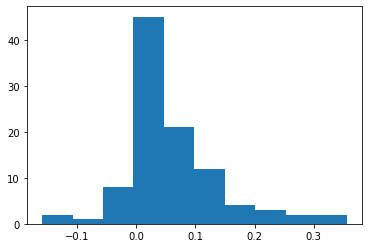

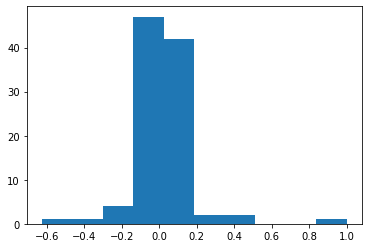

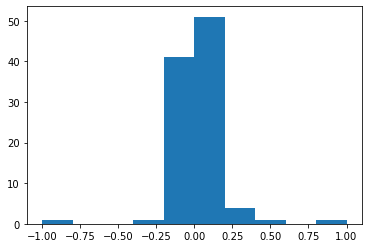

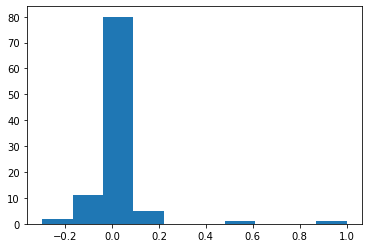

In [21]:
for a_lst in A_lst:
    num_bins = 10
    n, bins, patches = plt.hist(a_lst, num_bins)
    plt.show()

In [22]:
b_nm, cd_nm, cs_nm, SSE = optimize_noise_model_simple(R)
print(round(b_nm,5), round(cd_nm,5), round(cs_nm,4), round(SSE,5), "simple\n")
bs_nm, cs_nm, SSE = optimize_noise_model_bcs(R)
print(round(bs_nm,5), round(cs_nm,5), round(SSE,5), "bcs\n")
bd_nm, cd_nm, SSE = optimize_noise_model_bcd(R)
print(round(bd_nm,5), round(cd_nm,5), round(SSE,5), "bcd\n")

for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
    print( "{5:2d} {0:2d} :{6:3d}: {3:5.1f}  {4:5.1f}  ::  {1:7.3f}   {2:7.3f}".format(
        p, a, bd_nm*(cd_nm**(0.01*add)), add, ads, q, ctr 
    ) )

    
print("\n\n[q,p,a,R2_avg,R2_std,add,ads,ctr]")
for r in R:
    print(r)
    
    
print()
for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
    print( "{0:2d} & {6:3d} & {3:5.1f} & {4:5.1f} & {1:7.3f} & {2:7.3f}\\\hline".format(
        p, a, bd_nm*(cd_nm**(0.01*add)), add, ads, q, ctr 
    ) )
    
    
print()
for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
    print( "{0:2d} & {6:3d} & {3:5.1f} & {4:5.1f} & {1:7.3f} & {2:7.3f}\\\hline".format(
        p, a, bs_nm*(cs_nm**(0.01*ads)), add, ads, q, ctr 
    ) )

0.9932 1.0 0.5321 0.10274 simple

0.9931 0.5321 0.10274 bcs

0.9993 0.4144 0.20711 bcd

 7  0 :100:   1.0    1.0  ::    0.980     0.991
 7  1 :100:  75.4  100.8  ::    0.549     0.514
 7  2 :100: 137.8  192.8  ::    0.281     0.297
 7  3 :100: 207.1  292.0  ::    0.152     0.161
 7  4 :100: 292.3  420.0  ::    0.062     0.076
 7  5 :100: 363.9  524.3  ::    0.031     0.041
 7  6 :100: 449.3  643.3  ::    0.017     0.019
 7  7 :100: 506.1  727.7  ::    0.022     0.012


[q,p,a,R2_avg,R2_std,add,ads,ctr]
[7, 0, 0.9798060193980598, 0.94, 0.23748684174075835, 1.0, 1.0, 100]
[7, 1, 0.5491456294540442, 0.86, 0.3469870314579495, 75.44, 100.78, 100]
[7, 2, 0.28140985862216294, 0.82, 0.384187454245971, 137.83, 192.81, 100]
[7, 3, 0.15243843526750778, 0.82, 0.384187454245971, 207.11, 291.98, 100]
[7, 4, 0.06176681074069524, 0.73, 0.44395945760846234, 292.32, 420.02, 100]
[7, 5, 0.030556907889763688, 0.75, 0.4330127018922193, 363.86, 524.29, 100]
[7, 6, 0.016592168263179115, 0.8063515156974911, 0

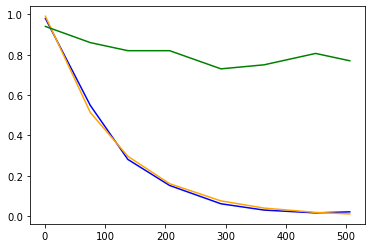

In [23]:
X = [ add for [q,p,a,R2_avg,R2_std,add,_,_] in R ]
Y2 = [ a for [q,p,a,R2_avg,R2_std,add,_,_] in R ]
Y3 = [ bd_nm*(cd_nm**(0.01*add)) for [q,p,a,R2_avg,R2_std,add,_,_] in R ]
Y4 = [ R2_avg for [q,p,a,R2_avg,R2_std,add,_,_] in R ]
fig, ax = plt.subplots()
ax.plot(X,Y2, color='blue')
ax.plot(X,Y3, color='orange')
ax.plot(X,Y4, color='green')
#ax.plot(X,Y2, color='magenta')

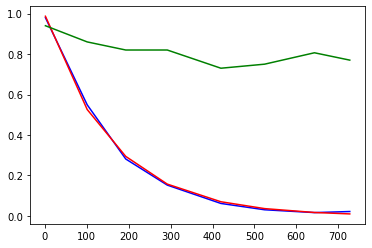

In [24]:
X = [ ads for [q,p,a,R2_avg,R2_std,add,ads,_] in R ]
Y2 = [ a for [q,p,a,R2_avg,R2_std,add,ads,_] in R ]
Y3 = [ bs_nm*(cs_nm**(0.01*ads)) for [q,p,a,R2_avg,R2_std,add,ads,_] in R ]
Y4 = [ R2_avg for [q,p,a,R2_avg,R2_std,add,ads,_] in R ]
fig, ax = plt.subplots()
ax.plot(X,Y2, color='blue')
ax.plot(X,Y3, color='red')
ax.plot(X,Y4, color='green')
#ax.plot(X,Y2, color='magenta')

In [25]:
%%time
results = []
n_tests = N_t
for q in range(nr_qubits,nr_qubits+1):
    for t in range(0,8):#(2,11):
        a_avg = 0
        R2_avg = 0
        R2_std = 0
        R2_nm_avg = 0
        R2_nm_std = 0
        acd = 0
        ctr_tests = 0
        for _ in range(n_tests):
            circ = random_circ(q,t)
            rcd = circ.depth()
            a_nm = b_nm*(cd_nm**(0.01*rcd))
            counts1 = clean_exc(circ)
            counts2 = noisy_exc(circ, noise_thermal)
            a,R2 = analyse_noise(counts1, counts2)
            ctr_tests += 1
            a_avg += a
            acd += circ.depth()
            R2_avg += R2
            R2_std += (R2**2)
            R2_nm = c_R2(counts1,counts2,a_nm)
            R2_nm_avg += R2_nm
            R2_nm_std += (R2_nm**2)
        if(ctr_tests>0):
            a_avg = a_avg/ctr_tests
            acd = acd/ctr_tests
            R2_avg = R2_avg/ctr_tests
            R2_std = R2_std/ctr_tests
            R2_nm_avg = R2_nm_avg/ctr_tests
            R2_nm_std = R2_nm_std/ctr_tests
            R2_std -= R2_avg**2
            R2_nm_std -= R2_nm_avg**2
            if(R2_std>=0.0):
                R2_std = np.sqrt(R2_std)
            if(R2_nm_std>=0.0):
                R2_nm_std = np.sqrt(R2_nm_std)
            result = "q={9:2d} p={0:2d} {7:6.1f} {8:3d} : a_avg={1:5.3f} R2_avg={2:5.2f} R2_std={3:5.2f} a_nm={4:5.3f} R2_nm_avg={5:5.2f} R2_nm_std={6:5.2f} ".format(
                t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, ctr_tests, q
            )
            results.append([t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, ctr_tests, q])
            print( result )
        else:
            print(q, t, "No usable circuits found.")

q= 7 p= 0    1.0 100 : a_avg=0.980 R2_avg= 0.96 R2_std= 0.20 a_nm=0.984 R2_nm_avg= 0.95 R2_nm_std= 0.04 


q= 7 p= 1   71.2 100 : a_avg=0.534 R2_avg= 0.75 R2_std= 0.43 a_nm=0.518 R2_nm_avg= 0.82 R2_nm_std= 0.28 


q= 7 p= 2  143.0 100 : a_avg=0.274 R2_avg= 0.80 R2_std= 0.40 a_nm=0.491 R2_nm_avg= 0.94 R2_nm_std= 0.16 


q= 7 p= 3  211.2 100 : a_avg=0.145 R2_avg= 0.74 R2_std= 0.44 a_nm=0.474 R2_nm_avg= 0.98 R2_nm_std= 0.03 


q= 7 p= 4  270.1 100 : a_avg=0.129 R2_avg= 0.74 R2_std= 0.44 a_nm=0.090 R2_nm_avg= 0.94 R2_nm_std= 0.22 


q= 7 p= 5  368.4 100 : a_avg=0.039 R2_avg= 0.70 R2_std= 0.45 a_nm=0.067 R2_nm_avg= 0.96 R2_nm_std= 0.19 


q= 7 p= 6  433.1 100 : a_avg=0.030 R2_avg= 0.74 R2_std= 0.44 a_nm=0.105 R2_nm_avg= 0.98 R2_nm_std= 0.10 


q= 7 p= 7  520.3 100 : a_avg=0.006 R2_avg= 0.78 R2_std= 0.41 a_nm=0.000 R2_nm_avg= 0.97 R2_nm_std= 0.15 
CPU times: user 36min 44s, sys: 1min 37s, total: 38min 22s
Wall time: 50min 16s


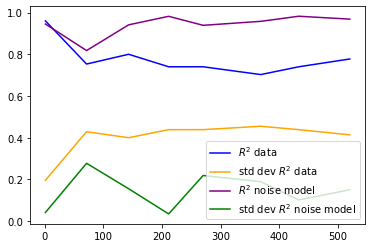

In [26]:
X = [ acd for [t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, _, q] in results ]
Y2 = [ R2_avg for [t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, _, q] in results ]
Y3 = [ R2_std for [t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, _, q] in results ]
Y4 = [ R2_nm_avg for [t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, _, q] in results ]
Y5 = [ R2_nm_std for [t,a_avg, R2_avg, R2_std, a_nm, R2_nm_avg, R2_nm_std, acd, _, q] in results ]
fig, ax = plt.subplots()
ax.plot(X,Y2, color='blue')
ax.plot(X,Y3, color='orange')
ax.plot(X,Y4, color='purple')
ax.plot(X,Y5, color='green')
#ax.plot(X,Y2, color='magenta')
plt.legend(['$R^{2}$ data', 'std dev $R^{2}$ data', '$R^{2}$ noise model', 'std dev $R^{2}$ noise model'])
plt.savefig("R2_noise_thermal.pdf")